# 部分空间法 -- SM

## 数据预处理

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits_data = load_digits()
x = digits_data.data
y = digits_data.target

x -= np.mean(x, axis=0)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1203, 64) (1203,)
(594, 64) (594,)


##  SM模型在训练集测试

In [2]:
from sm import SM
sm = SM(n_dimension=10)
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
sm.score(X_test, y_test)

0.8333333333333334

## 分成训练集和验证集，通过GridSearch寻找最佳参数

In [2]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_dimension': [i for i in range(1,20)]}
# cv=5 5折交叉验证
gs = GridSearchCV(sm, parameters, cv=5)
gs.fit(X_train, y_test)
gs.best_params_

NameError: name 'sm' is not defined

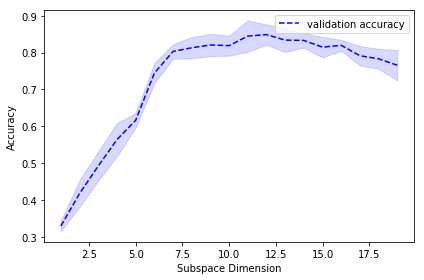

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

param_range = gs.param_grid['n_dimension']

test_mean = gs.cv_results_['mean_test_score']
test_std = gs.cv_results_['std_test_score']

plt.plot(param_range, test_mean, 
         color='blue', linestyle='--', 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='blue')

plt.legend(loc='best')
plt.xlabel('Subspace Dimension')
plt.ylabel('Accuracy')
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

## 测试集结果

In [5]:
sm = SM(**gs.best_params_)
#sm = SM(12)
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
sm.score(X_test, y_test)

0.5336700336700336

In [17]:
sm.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
sm.get_params()

{'n_dimension': 12}